In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
logfiles = []
for root, dirs, files in os.walk('../'):
    for file in files:
        if file == 'logs.csv':
            logfiles.append(os.path.join(root, file))
            
logfiles_dict = {os.path.dirname(logfile).split('\\')[1]: pd.read_csv(logfile) for logfile in logfiles}
for key, val in logfiles_dict.items():
    val['source'] = key
    val = val.rename(columns={'Var1':'value', 'Var2':'metric', 'Var3':'followflowfront', 'Var4':'cut_at', 'Var5':'ideal_threshold', 
                              'Var6':'slope', 'Var7':'sigma', 'Var8':'fraction'})
    logfiles_dict[key] = val
    
logdfs = list(logfiles_dict.keys())

In [56]:
logdfs

['i_05_no_bl_85',
 'i_07_no_bl_85',
 'i_1_no_bl_85',
 't_05_no_bl_80',
 't_07_no_bl_80',
 't_1_no_bl_80',
 'u_05_no_bl_90',
 'u_07_no_bl_90',
 'u_1_no_bl_90']

In [57]:
ignore_list = ['lyukas_13_no_bl_80_rm']
to_concat = [logfiles_dict[logdf] for logdf in logdfs if logdf not in ignore_list]
combined_logs = pd.concat(to_concat, ignore_index=True)
combined_logs['value_metric'] = combined_logs['value'] + ' - ' + combined_logs['metric']



In [58]:
combined_logs

,value,metric,followflowfront,cut_at,ideal_threshold,slope,sigma,fraction,source,value_metric
0,shearrate,max-min,no,cumvar max,1.70,-0.488174,0.227207,0.180193,i_05_no_bl_85,shearrate - max-min
1,shearrate,(max-min)/mean,no,cumvar max,1.75,-0.356665,0.181142,0.129999,i_05_no_bl_85,shearrate - (max-min)/mean
2,shearrate,(max-min)/max,no,cumvar max,1.55,-0.580518,0.220893,0.141362,i_05_no_bl_85,shearrate - (max-min)/max
3,temperature,max-min,yes,deriv min,2.65,-0.058971,0.059026,0.206712,i_05_no_bl_85,temperature - max-min
4,temperature,(max-min)/mean,yes,deriv min,2.50,-0.057929,0.052846,0.203174,i_05_no_bl_85,temperature - (max-min)/mean
...,...,...,...,...,...,...,...,...,...,...
130,angle of velocity vector,(max-min)/mean,no,no cut,5.50,-0.033094,0.091394,0.075903,u_1_no_bl_90,angle of velocity vector - (max-min)/mean
131,angle of velocity vector,(max-min)/max,no,cumvar max,5.35,-0.060581,0.163725,0.115599,u_1_no_bl_90,angle of velocity vector - (max-min)/max
132,viscosity,max-min,yes,cumvar max,1.85,-0.145270,0.081935,0.163759,u_1_no_bl_90,viscosity - max-min
133,viscosity,(max-min)/mean,yes,cumvar max,1.55,-0.331305,0.125256,0.190455,u_1_no_bl_90,viscosity - (max-min)/mean


In [59]:
sigmas = combined_logs.pivot(index='source', columns='value_metric', values='sigma')
sigmas = sigmas[['shearrate - max-min', 'temperature - max-min', 'temperature - (max-min)/mean', 'temperature - (max-min)/max', 'length of velocity vector - max-min', 
                'length of velocity vector - (max-min)/mean', 'length of velocity vector - (max-min)/max', 'angle of velocity vector - max-min']]
slopes = combined_logs.pivot(index='source', columns='value_metric', values='slope')
slopes = slopes[['shearrate - max-min', 'temperature - max-min', 'temperature - (max-min)/mean', 'temperature - (max-min)/max', 'length of velocity vector - max-min', 
                'length of velocity vector - (max-min)/mean', 'length of velocity vector - (max-min)/max', 'angle of velocity vector - max-min']]
fractions = combined_logs.pivot(index='source', columns='value_metric', values='fraction')
ideal_thresholds = combined_logs.pivot(index='source', columns='value_metric', values='ideal_threshold')
cut_ats = combined_logs.pivot(index='source', columns='value_metric', values='cut_at')


In [60]:
sigmas

value_metric,shearrate - max-min,temperature - max-min,temperature - (max-min)/mean,temperature - (max-min)/max,length of velocity vector - max-min,length of velocity vector - (max-min)/mean,length of velocity vector - (max-min)/max,angle of velocity vector - max-min
source,,,,,,,,
i_05_no_bl_85,0.227207,0.059026,0.052846,0.059121,0.186021,0.082533,0.037547,0.208957
i_07_no_bl_85,0.226997,0.074080,0.054042,0.074235,0.191653,0.094894,0.015986,0.188333
i_1_no_bl_85,0.231165,0.094983,0.068373,0.095113,0.183564,0.094687,0.001234,0.109378
t_05_no_bl_80,0.136703,0.055120,0.040220,0.055250,0.121700,0.082685,0.043619,0.121524
t_07_no_bl_80,0.121084,0.069457,0.050252,0.069644,0.118310,0.095222,0.016422,0.105495
t_1_no_bl_80,0.116665,0.094484,0.063996,0.094962,0.124836,0.080643,0.001797,0.076708
u_05_no_bl_90,0.213629,0.066670,0.051587,0.066633,0.179306,0.081374,0.041684,0.161913
u_07_no_bl_90,0.216743,0.090567,0.064138,0.090323,0.187488,0.093565,0.016116,0.134854
u_1_no_bl_90,0.219418,0.125113,0.087902,0.124811,0.180366,0.092968,0.010154,0.081811


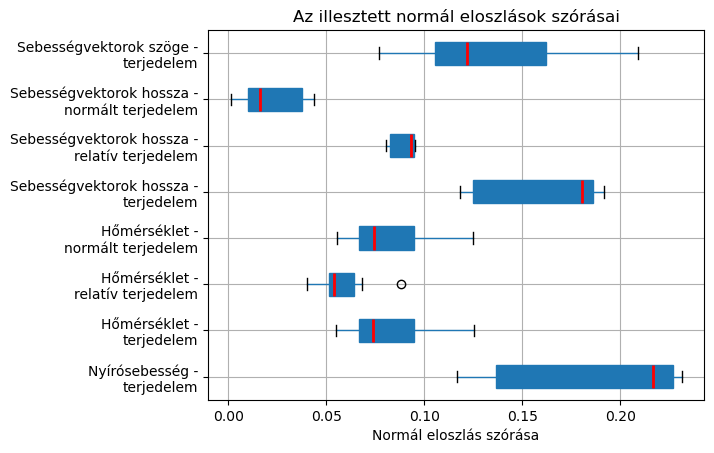

In [61]:
catnames = ['Nyírósebesség -\nterjedelem', 'Hőmérséklet -\nterjedelem', 'Hőmérséklet -\nrelatív terjedelem', 'Hőmérséklet -\nnormált terjedelem',
            'Sebességvektorok hossza -\nterjedelem', 'Sebességvektorok hossza -\nrelatív terjedelem', 'Sebességvektorok hossza -\nnormált terjedelem',
            'Sebességvektorok szöge -\nterjedelem']
sigmas.columns = catnames


sigmas.boxplot(vert=False, patch_artist=True, medianprops=dict(color="red", linewidth=2))
plt.title('Az illesztett normál eloszlások szórásai')
plt.xlabel('Normál eloszlás szórása')
plt.savefig('sigmas.png')

Text(0.5, 0, 'Egyenes meredeksége')

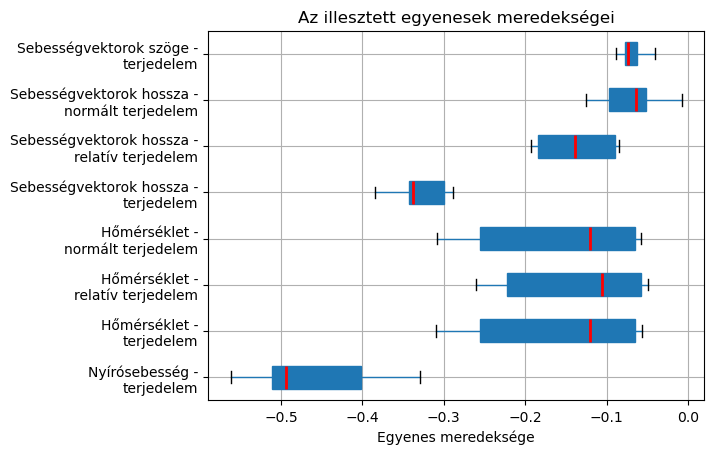

In [63]:
catnames = ['Nyírósebesség -\nterjedelem', 'Hőmérséklet -\nterjedelem', 'Hőmérséklet -\nrelatív terjedelem', 'Hőmérséklet -\nnormált terjedelem',
            'Sebességvektorok hossza -\nterjedelem', 'Sebességvektorok hossza -\nrelatív terjedelem', 'Sebességvektorok hossza -\nnormált terjedelem',
            'Sebességvektorok szöge -\nterjedelem']
slopes.columns = catnames


slopes.boxplot(vert=False, patch_artist=True, medianprops=dict(color="red", linewidth=2))
plt.title('Az illesztett egyenesek meredekségei')
plt.xlabel('Egyenes meredeksége')